In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.tsa.stattools import adfuller
%matplotlib inline

In [2]:
# Set parameters for better visualization
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (15, 10)

In [3]:
df = pd.read_csv("MonthWiseMarketArrivals_clean.csv")
df.head()

,market,month,year,quantity,priceMin,priceMax,priceMod,state,city,date
0,ABOHAR(PB),January,2005,2350,404,493,446,PB,ABOHAR,2005-01-01
1,ABOHAR(PB),January,2006,900,487,638,563,PB,ABOHAR,2006-01-01
2,ABOHAR(PB),January,2010,790,1283,1592,1460,PB,ABOHAR,2010-01-01
3,ABOHAR(PB),January,2011,245,3067,3750,3433,PB,ABOHAR,2011-01-01
4,ABOHAR(PB),January,2012,1035,523,686,605,PB,ABOHAR,2012-01-01


In [4]:
# change the date column to time interval column
df.date = pd.DatetimeIndex(df.date)

In [5]:
# change the index to date column
df.index = pd.PeriodIndex(df.date, freq="M")
df.head()

,market,month,year,quantity,priceMin,priceMax,priceMod,state,city,date
date,,,,,,,,,,
2005-01,ABOHAR(PB),January,2005,2350,404,493,446,PB,ABOHAR,2005-01-01
2006-01,ABOHAR(PB),January,2006,900,487,638,563,PB,ABOHAR,2006-01-01
2010-01,ABOHAR(PB),January,2010,790,1283,1592,1460,PB,ABOHAR,2010-01-01
2011-01,ABOHAR(PB),January,2011,245,3067,3750,3433,PB,ABOHAR,2011-01-01
2012-01,ABOHAR(PB),January,2012,1035,523,686,605,PB,ABOHAR,2012-01-01


In [6]:
df = df.sort_values(by="date")
df.head()

C:\Users\u23e00\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: 'date' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version
  """Entry point for launching an IPython kernel.


,market,month,year,quantity,priceMin,priceMax,priceMod,state,city,date
date,,,,,,,,,,
1996-01,LASALGAON(MS),January,1996,225063,160,257,226,MS,LASALGAON,1996-01-01
1996-02,LASALGAON(MS),February,1996,196164,133,229,186,MS,LASALGAON,1996-02-01
1996-03,LASALGAON(MS),March,1996,178992,155,274,243,MS,LASALGAON,1996-03-01
1996-04,LASALGAON(MS),April,1996,192592,136,279,254,MS,LASALGAON,1996-04-01
1996-05,LASALGAON(MS),May,1996,237574,154,312,269,MS,LASALGAON,1996-05-01


### Onion price in Bangalore

In [7]:
df_bang = df.loc[df.city == "BANGALORE"].copy()
df_bang.head()

,market,month,year,quantity,priceMin,priceMax,priceMod,state,city,date
date,,,,,,,,,,
2004-01,BANGALORE,January,2004,227832,916,1066,991,KNT,BANGALORE,2004-01-01
2004-02,BANGALORE,February,2004,225133,741,870,793,KNT,BANGALORE,2004-02-01
2004-03,BANGALORE,March,2004,221952,527,586,556,KNT,BANGALORE,2004-03-01
2004-04,BANGALORE,April,2004,185150,419,518,465,KNT,BANGALORE,2004-04-01
2004-05,BANGALORE,May,2004,137390,400,516,455,KNT,BANGALORE,2004-05-01


In [8]:
df_bang = df_bang.drop(["market","month","year","priceMin","priceMax","state","city"], axis=1)
df_bang.head()

,quantity,priceMod,date
date,,,
2004-01,227832,991,2004-01-01
2004-02,225133,793,2004-02-01
2004-03,221952,556,2004-03-01
2004-04,185150,465,2004-04-01
2004-05,137390,455,2004-05-01


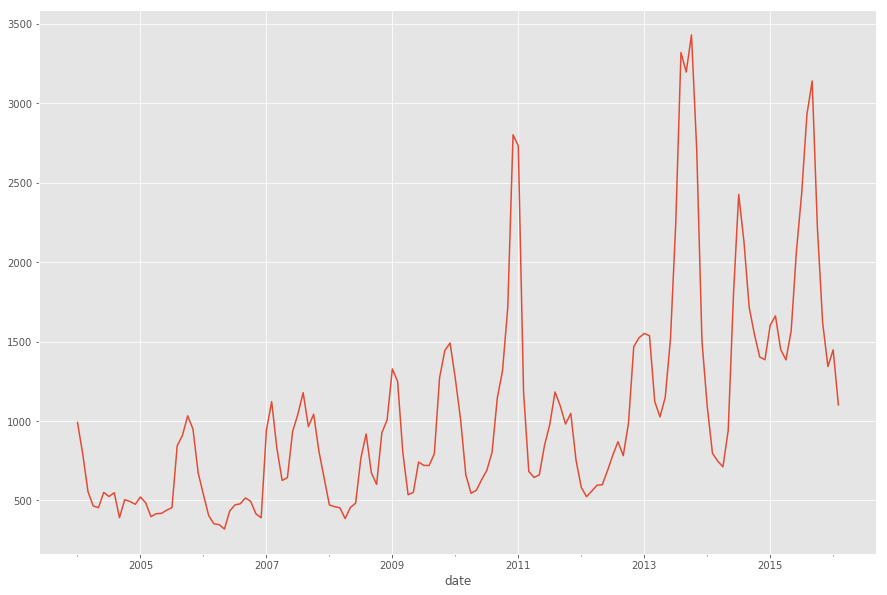

In [9]:
df_bang.priceMod.plot()
plt.show()

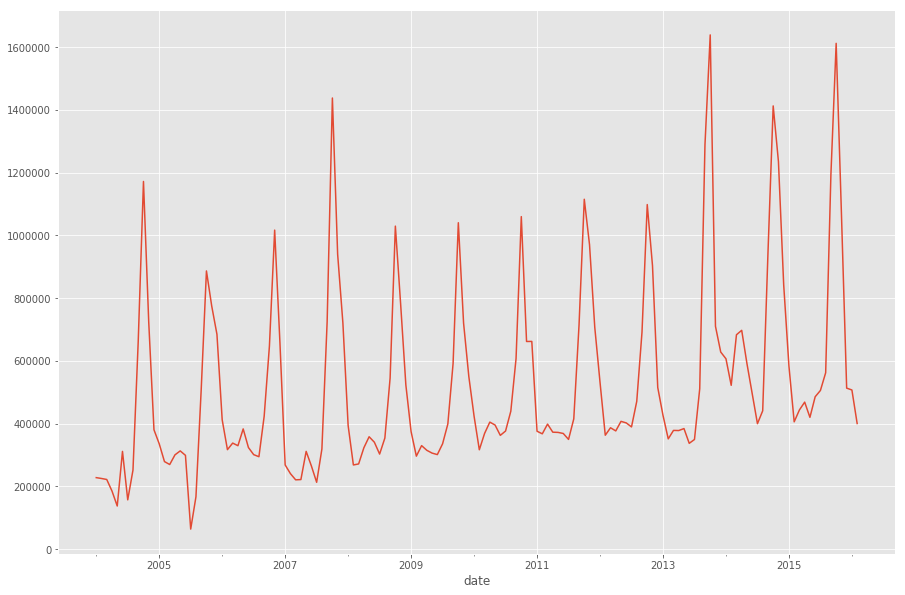

In [10]:
df_bang.quantity.plot()
plt.show()

### Log Transformation 

Log-transformations can help to stabilize the variance of a time series.
Let see using an example:

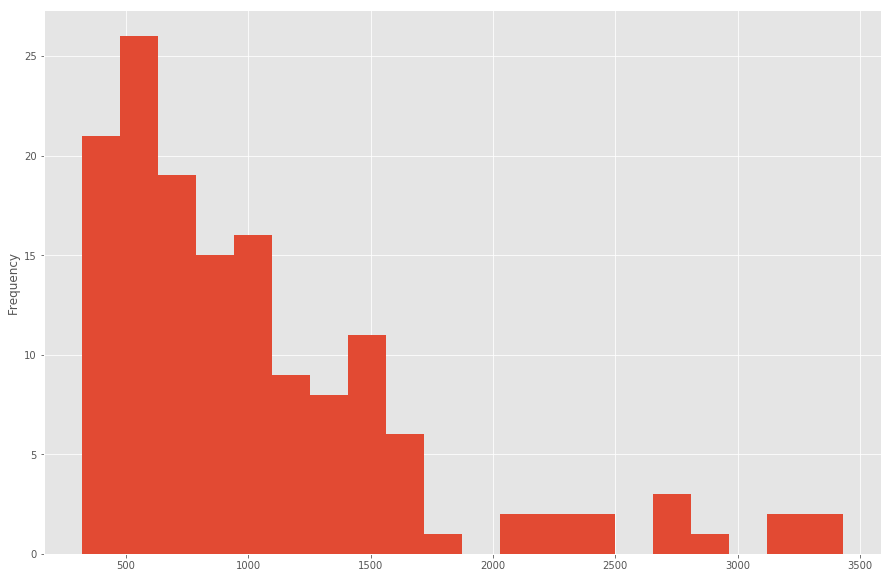

In [11]:
df_bang.priceMod.plot(kind="hist", bins=20)

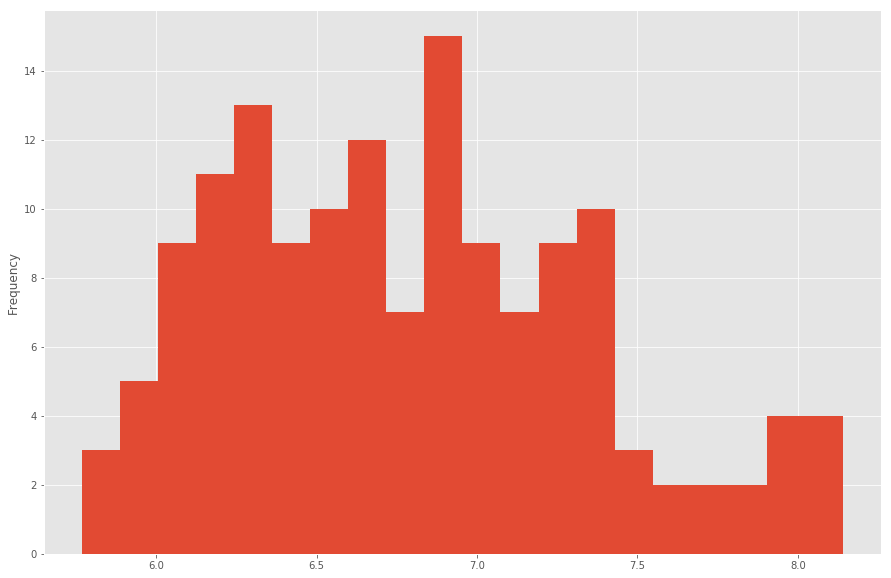

In [12]:
df_bang["log_priceMod"] = np.log(df_bang.priceMod)
df_bang.log_priceMod.plot(kind="hist", bins=20)

#### The above histogram is more look like normal distribution

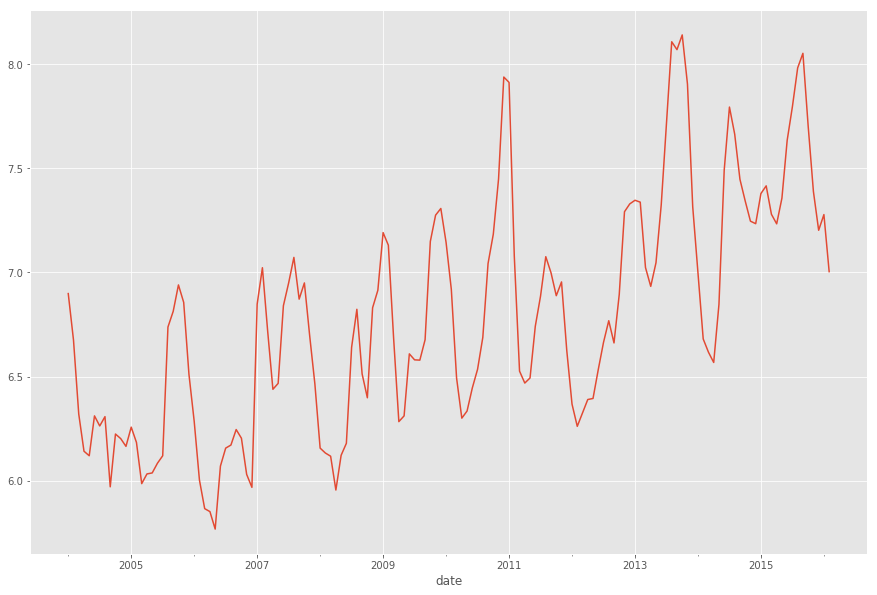

In [13]:
df_bang.log_priceMod.plot()

# Basic Time Series Model

We will build a time-series forecasting model to get a forecast for Onion prices. Let us start with the three most basic models -

   1. Mean Constant Model
   2. Linear Trend Model
   3. Random Walk Model


## 1. Mean Constant Model

In [14]:
df_bang_mean = df_bang.log_priceMod.mean()
df_bang["mean_price"] = np.exp(df_bang_mean)
df_bang.head()

,quantity,priceMod,date,log_priceMod,mean_price
date,,,,,
2004-01,227832,991,2004-01-01,6.898715,884.565812
2004-02,225133,793,2004-02-01,6.675823,884.565812
2004-03,221952,556,2004-03-01,6.320768,884.565812
2004-04,185150,465,2004-04-01,6.142037,884.565812
2004-05,137390,455,2004-05-01,6.120297,884.565812


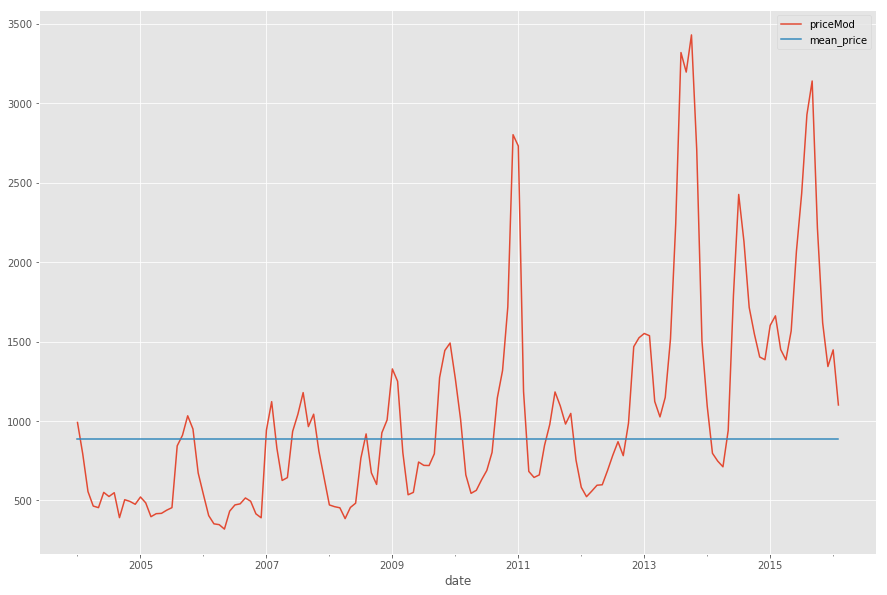

In [15]:
df_bang.plot(kind="line", x="date", y=["priceMod", "mean_price"])

### Evaluate this model using RSME

In [16]:
def RMSE(actual, predicted):
    mse = (actual - predicted)**2
    rmse = np.sqrt(mse.sum()/mse.count())
    return rmse

In [17]:
mean_modelRMSE = RMSE(df_bang.priceMod, df_bang.mean_price)
mean_modelRMSE

683.9533483996255

Lets save the model's RMSE in dataframe:

In [18]:
Result_df = pd.DataFrame(columns =["Model","Forcast","RMSE"])
Result_df.loc[0,"Model"] = "Mean Model"
Result_df.loc[0,"Forcast"] = np.exp(df_bang_mean)
Result_df.loc[0,"RMSE"] = mean_modelRMSE
Result_df

,Model,Forcast,RMSE
0,Mean Model,884.566,683.953


## 2. Linear Trend Model

Let us start by plotting a linear trend model between log_priceMod and time.

However to do linear regression, we need a numeric indicator for time period - Let us create that

In [19]:
df_bang.head()

,quantity,priceMod,date,log_priceMod,mean_price
date,,,,,
2004-01,227832,991,2004-01-01,6.898715,884.565812
2004-02,225133,793,2004-02-01,6.675823,884.565812
2004-03,221952,556,2004-03-01,6.320768,884.565812
2004-04,185150,465,2004-04-01,6.142037,884.565812
2004-05,137390,455,2004-05-01,6.120297,884.565812


In [20]:
df_bang.info()

<class 'pandas.core.frame.DataFrame'>
PeriodIndex: 146 entries, 2004-01 to 2016-02
Freq: M
Data columns (total 5 columns):
quantity        146 non-null int64
priceMod        146 non-null int64
date            146 non-null datetime64[ns]
log_priceMod    146 non-null float64
mean_price      146 non-null float64
dtypes: datetime64[ns](1), float64(2), int64(2)
memory usage: 6.8 KB


In [21]:
# Converting the date into datetinme delta starting from 0
df_bang["timeindex"] = df_bang.date - df_bang.date.min()
df_bang.head()

,quantity,priceMod,date,log_priceMod,mean_price,timeindex
date,,,,,,
2004-01,227832,991,2004-01-01,6.898715,884.565812,0 days
2004-02,225133,793,2004-02-01,6.675823,884.565812,31 days
2004-03,221952,556,2004-03-01,6.320768,884.565812,60 days
2004-04,185150,465,2004-04-01,6.142037,884.565812,91 days
2004-05,137390,455,2004-05-01,6.120297,884.565812,121 days


In [22]:
df_bang.dtypes

quantity                  int64
priceMod                  int64
date             datetime64[ns]
log_priceMod            float64
mean_price              float64
timeindex       timedelta64[ns]
dtype: object

In [23]:
# converting the timeindex into months using timedelta
df_bang["timeindex"] = df_bang["timeindex"]/np.timedelta64(1,"M")
df_bang.head()

,quantity,priceMod,date,log_priceMod,mean_price,timeindex
date,,,,,,
2004-01,227832,991,2004-01-01,6.898715,884.565812,0.000000
2004-02,225133,793,2004-02-01,6.675823,884.565812,1.018501
2004-03,221952,556,2004-03-01,6.320768,884.565812,1.971293
2004-04,185150,465,2004-04-01,6.142037,884.565812,2.989794
2004-05,137390,455,2004-05-01,6.120297,884.565812,3.975441


In [24]:
df_bang["timeindex"] = df_bang["timeindex"].round(0).astype(int)
df_bang.tail()

,quantity,priceMod,date,log_priceMod,mean_price,timeindex
date,,,,,,
2015-10,1612160,2215,2015-10-01,7.703008,884.565812,141
2015-11,1071872,1618,2015-11-01,7.388946,884.565812,142
2015-12,513186,1343,2015-12-01,7.202661,884.565812,143
2016-01,507223,1448,2016-01-01,7.277939,884.565812,144
2016-02,400359,1101,2016-02-01,7.003974,884.565812,145


### Apply the linear model 

In [25]:
linear_model = smf.ols('log_priceMod ~ timeindex', data = df_bang).fit()
linear_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           log_priceMod   R-squared:                       0.493
Model:                            OLS   Adj. R-squared:                  0.489
Method:                 Least Squares   F-statistic:                     139.8
Date:                Wed, 21 Aug 2019   Prob (F-statistic):           5.75e-23
Time:                        15:48:11   Log-Likelihood:                -72.317
No. Observations:                 146   AIC:                             148.6
Df Residuals:                     144   BIC:                             154.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.1121      0.066     92.830      0.000       5.982       6.242
timeindex      0.0093      0.001     11.823      0.000       0.008       0.011
==============================================================================
Omnibus:                        4.750   Durbin-Watson:                   0.384
Prob(Omnibus):                  0.093   Jarque-Bera (JB):                4.739
Skew:                           0.405   Prob(JB):                       0.0935
Kurtosis:                       2.648   Cond. No.                         167.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [26]:
linear_model_pred = linear_model.predict()
linear_model_pred

array([6.11210813, 6.12139074, 6.13067334, 6.13995594, 6.14923855,
       6.15852115, 6.16780376, 6.17708636, 6.18636896, 6.19565157,
       6.20493417, 6.21421678, 6.22349938, 6.23278198, 6.24206459,
       6.25134719, 6.2606298 , 6.2699124 , 6.279195  , 6.28847761,
       6.29776021, 6.30704282, 6.31632542, 6.32560802, 6.33489063,
       6.34417323, 6.35345583, 6.36273844, 6.37202104, 6.38130365,
       6.39058625, 6.39986885, 6.40915146, 6.41843406, 6.42771667,
       6.43699927, 6.44628187, 6.45556448, 6.46484708, 6.47412969,
       6.48341229, 6.49269489, 6.5019775 , 6.5112601 , 6.52054271,
       6.52982531, 6.53910791, 6.54839052, 6.55767312, 6.56695572,
       6.57623833, 6.58552093, 6.59480354, 6.60408614, 6.61336874,
       6.62265135, 6.63193395, 6.64121656, 6.65049916, 6.65978176,
       6.66906437, 6.67834697, 6.68762958, 6.69691218, 6.70619478,
       6.71547739, 6.72475999, 6.7340426 , 6.7433252 , 6.7526078 ,
       6.76189041, 6.77117301, 6.78045561, 6.78973822, 6.79902

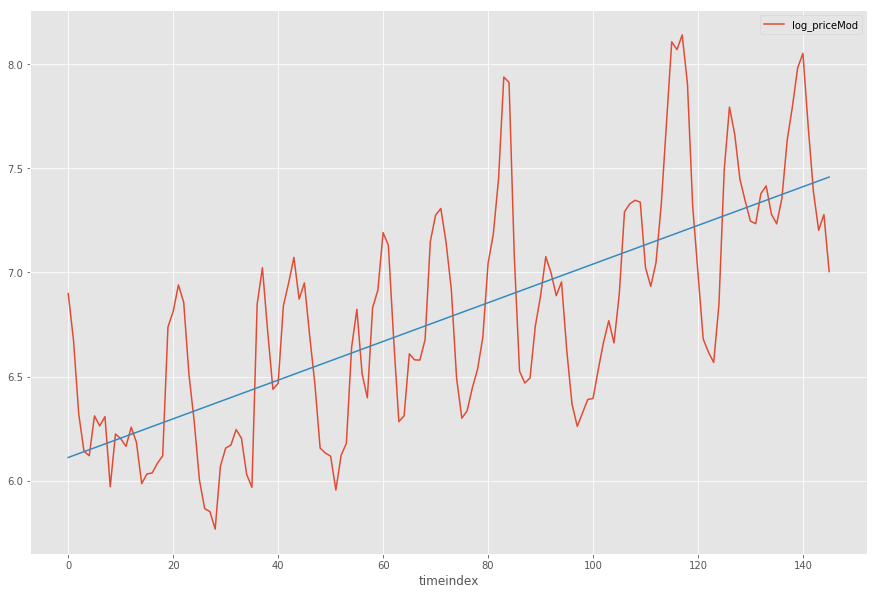

In [27]:
df_bang.plot(kind = "line", x="timeindex", y="log_priceMod")
plt.plot(df_bang.timeindex, linear_model_pred)

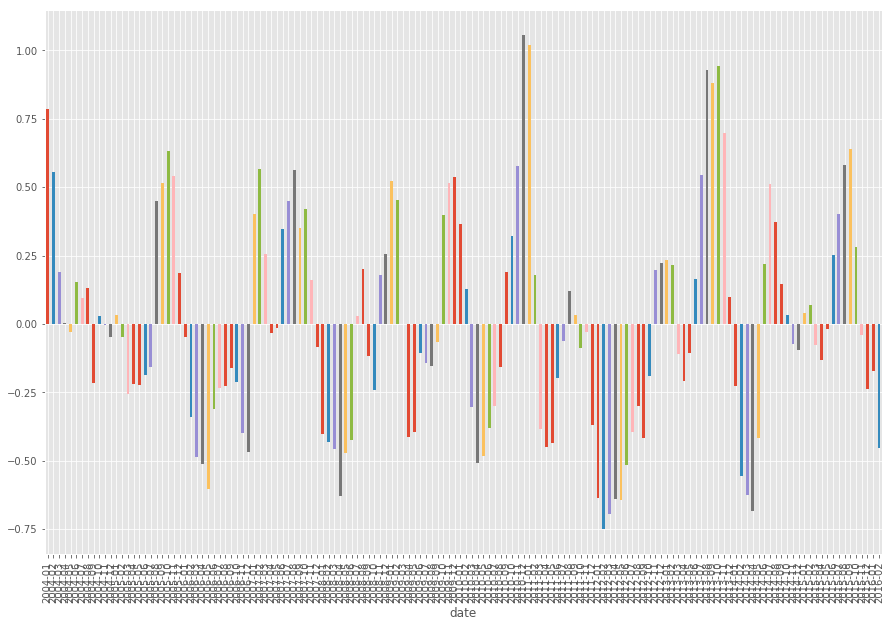

In [28]:
linear_model.resid.plot(kind="bar")

#### What measures can we check to see if the model is good?

It is seen here (and also evident on the regression line plot, if you look closely) that the linear trend model has a tendency to make an error of the same sign for many periods in a row. This tendency is measured in statistical terms by the lag-1 autocorrelation and Durbin-Watson statistic. If there is no time pattern, the lag-1 autocorrelation should be very close to zero, and the Durbin-Watson statistic ought to be very close to 2, which is not the case here. If the model has succeeded in extracting all the "signal" from the data, there should be no pattern at all in the errors: the error in the next period should not be correlated with any previous errors. The linear trend model obviously fails the autocorrelation test in this case.

* Durbin Watson statistic is a test for autocorrelation in a data set.
* The DW statistic always has a value between zero and 4.0.
* A value of 2.0 means there is no autocorrelation detected in the sample. Values from zero to 2.0 indicate positive autocorrelation and values from 2.0 to 4.0 indicate negative autocorrelation

A stock price displaying positive autocorrelation would indicate that the price yesterday has a positive correlation on the price today—so if the stock fell yesterday, it is also likely that it falls today. A security that has a negative autocorrelation, on the other hand, has a negative influence on itself over time—so that if it fell yesterday, there is a greater likelihood it will rise today.

In [29]:
# Manual Calculation
model_linear_forecast_manual = 0.0093 * 146 + 6.1121
model_linear_forecast_manual

7.4699

In [30]:
df_bang["linear_price"] = np.exp(linear_model_pred)
df_bang.head()

,quantity,priceMod,date,log_priceMod,mean_price,timeindex,linear_price
date,,,,,,,
2004-01,227832,991,2004-01-01,6.898715,884.565812,0,451.289090
2004-02,225133,793,2004-02-01,6.675823,884.565812,1,455.497732
2004-03,221952,556,2004-03-01,6.320768,884.565812,2,459.745622
2004-04,185150,465,2004-04-01,6.142037,884.565812,3,464.033127
2004-05,137390,455,2004-05-01,6.120297,884.565812,4,468.360617


In [31]:
linear_model_RMSE = RMSE(df_bang.priceMod, df_bang.linear_price)
linear_model_RMSE

518.5236075841475

In [32]:
Result_df.loc[1,"Model"] = "Linear Model"
Result_df.loc[1,"Forcast"] = np.exp(model_linear_forecast_manual)
Result_df.loc[1,"RMSE"] = linear_model_RMSE
Result_df

,Model,Forcast,RMSE
0,Mean Model,884.566,683.953
1,Linear Model,1754.43,518.524


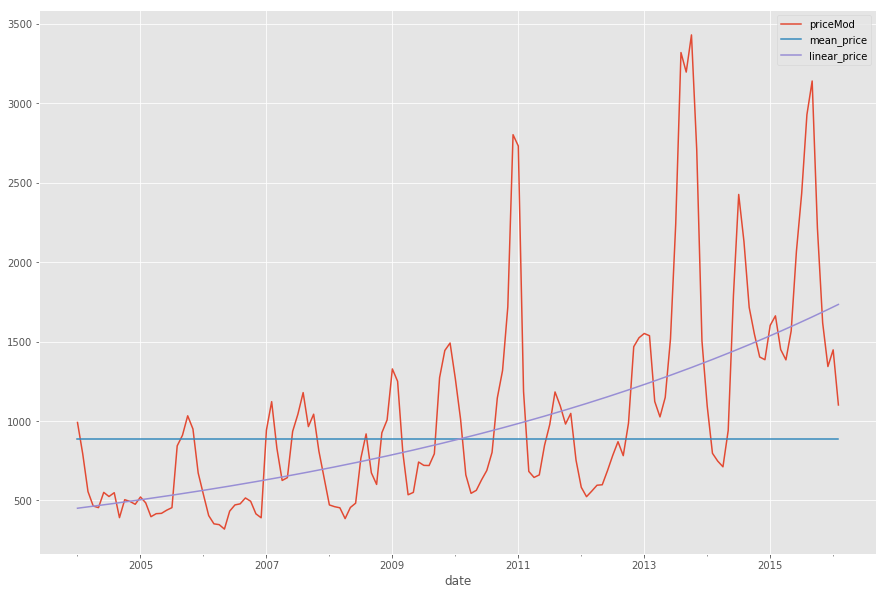

In [33]:
df_bang.plot(kind="line", x="date", y=["priceMod", "mean_price","linear_price"])

In [34]:
linear_model_quant = smf.ols('log_priceMod ~ timeindex + np.log(quantity)', data = df_bang).fit()
linear_model_quant.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           log_priceMod   R-squared:                       0.509
Model:                            OLS   Adj. R-squared:                  0.502
Method:                 Least Squares   F-statistic:                     74.16
Date:                Wed, 21 Aug 2019   Prob (F-statistic):           8.00e-23
Time:                        15:48:13   Log-Likelihood:                -69.892
No. Observations:                 146   AIC:                             145.8
Df Residuals:                     143   BIC:                             154.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            4.1813      0.881      4.746      0.000       2.440       5.923
timeindex            0.0084      0.001      9.774      0.000       0.007       0.010
np.log(quantity)     0.1529      0.070      2.198      0.030       0.015       0.290
==============================================================================
Omnibus:                        5.097   Durbin-Watson:                   0.412
Prob(Omnibus):                  0.078   Jarque-Bera (JB):                4.952
Skew:                           0.403   Prob(JB):                       0.0841
Kurtosis:                       2.593   Cond. No.                     2.29e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.29e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

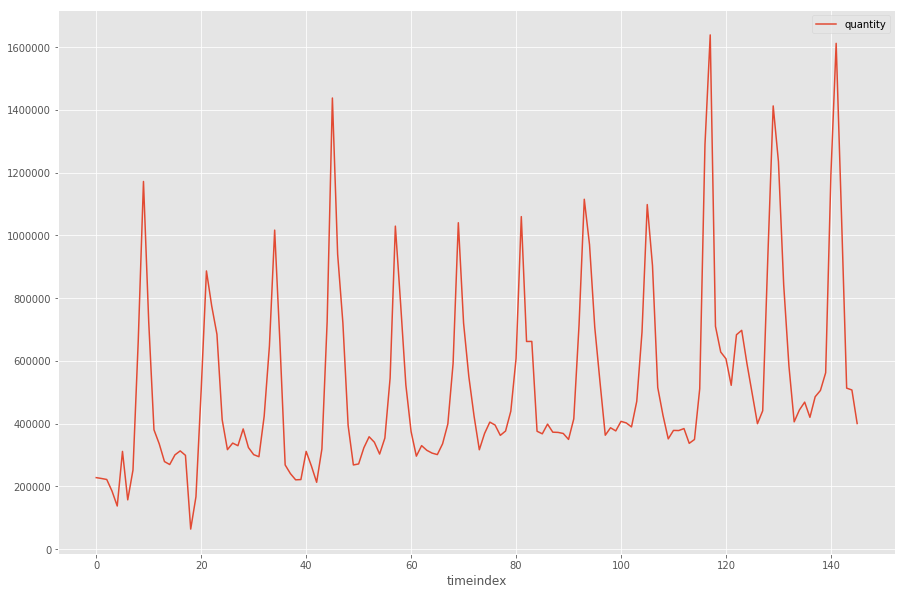

In [35]:
df_bang["linear_price_quant"] = np.exp(linear_model_quant.predict())
df_bang.plot(kind = "line", x="timeindex", y = "quantity")
plt.show()

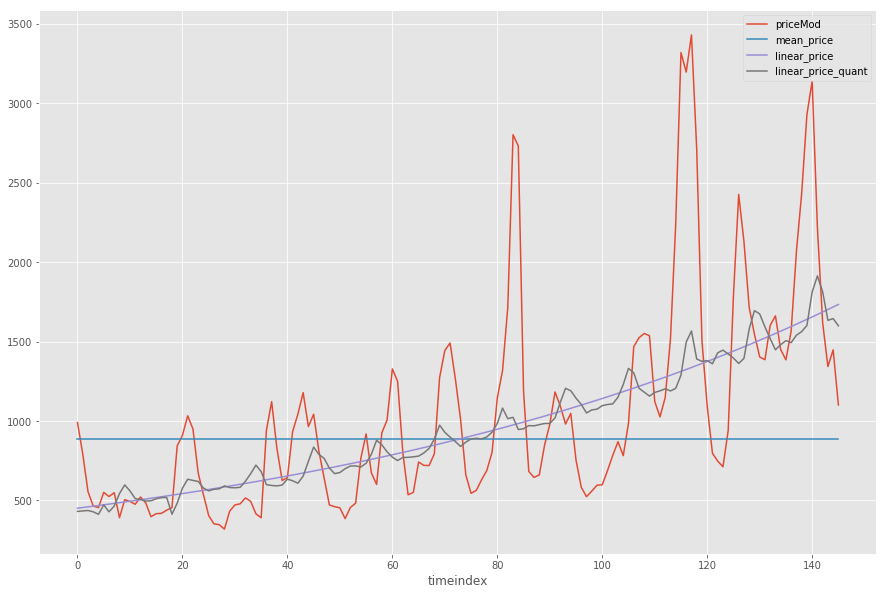

In [36]:
df_bang.plot(kind="line", x="timeindex", y = ["priceMod", "mean_price", 
                                             "linear_price", "linear_price_quant"])
plt.show()

## Random Walk Model

When faced with a time series that shows irregular growth, the best strategy may not be to try to directly predict the level of the series at each period (i.e., the quantity Yt). Instead, it may be better to try to predict the change that occurs from one period to the next (i.e., the quantity Yt - Yt-1). 

That is, it may be better to look at the first difference of the series, to see if a predictable pattern can be found there. For purposes of one-period-ahead forecasting, it is just as good to predict the next change as to predict the next level of the series, since the predicted change can be added to the current level to yield a predicted level. The simplest case of such a model is one that always predicts that the next change will be zero, as if the series is equally likely to go up or down in the next period regardless of what it has done in the past.

There are two types of random walks

    Random walk without drift (no constant or intercept)
    Random walk with drift (with a constant term)
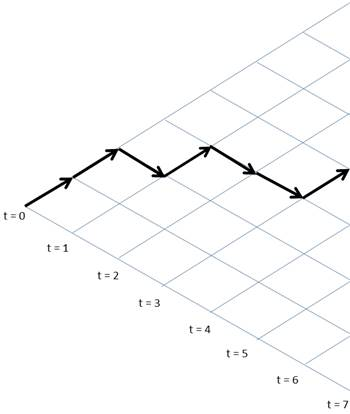

In [37]:

df_bang["shift_log_priceMod"] = df_bang.log_priceMod.shift()
df_bang.head()

,quantity,priceMod,date,log_priceMod,mean_price,timeindex,linear_price,linear_price_quant,shift_log_priceMod
date,,,,,,,,,
2004-01,227832,991,2004-01-01,6.898715,884.565812,0,451.289090,431.410971,NaN
2004-02,225133,793,2004-02-01,6.675823,884.565812,1,455.497732,434.277110,6.898715
2004-03,221952,556,2004-03-01,6.320768,884.565812,2,459.745622,437.007747,6.675823
2004-04,185150,465,2004-04-01,6.142037,884.565812,3,464.033127,428.667281,6.320768
2004-05,137390,455,2004-05-01,6.120297,884.565812,4,468.360617,413.029454,6.142037


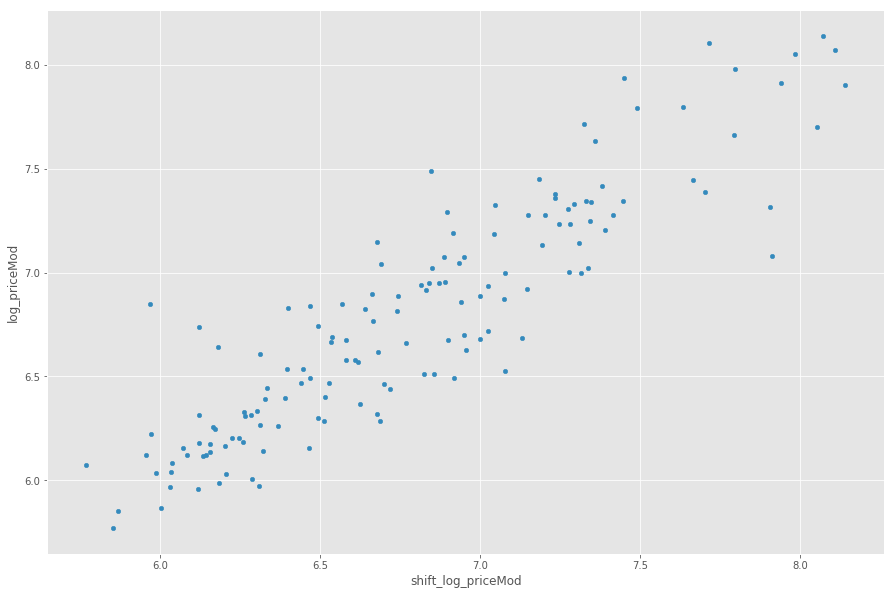

In [38]:
df_bang.plot(kind="scatter", x="shift_log_priceMod", y ="log_priceMod", s=20 )

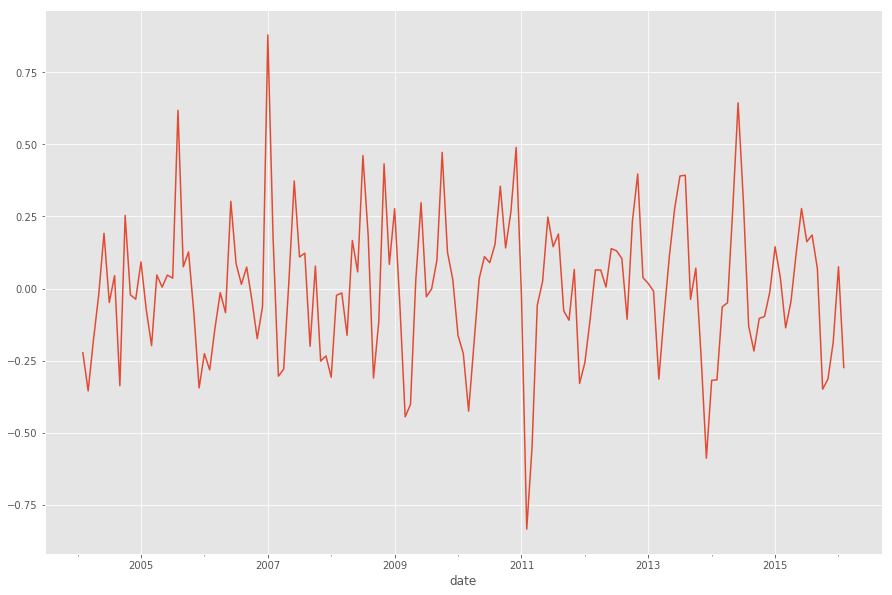

In [39]:
df_bang["log_priceMod_diff"] = df_bang.log_priceMod - df_bang.shift_log_priceMod
df_bang.log_priceMod_diff.plot()

In [40]:
df_bang["random_price"] = np.exp(df_bang.shift_log_priceMod)
df_bang.head()

,quantity,priceMod,date,log_priceMod,mean_price,timeindex,linear_price,linear_price_quant,shift_log_priceMod,log_priceMod_diff,random_price
date,,,,,,,,,,,
2004-01,227832,991,2004-01-01,6.898715,884.565812,0,451.289090,431.410971,NaN,NaN,NaN
2004-02,225133,793,2004-02-01,6.675823,884.565812,1,455.497732,434.277110,6.898715,-0.222891,991.0
2004-03,221952,556,2004-03-01,6.320768,884.565812,2,459.745622,437.007747,6.675823,-0.355055,793.0
2004-04,185150,465,2004-04-01,6.142037,884.565812,3,464.033127,428.667281,6.320768,-0.178731,556.0
2004-05,137390,455,2004-05-01,6.120297,884.565812,4,468.360617,413.029454,6.142037,-0.021740,465.0


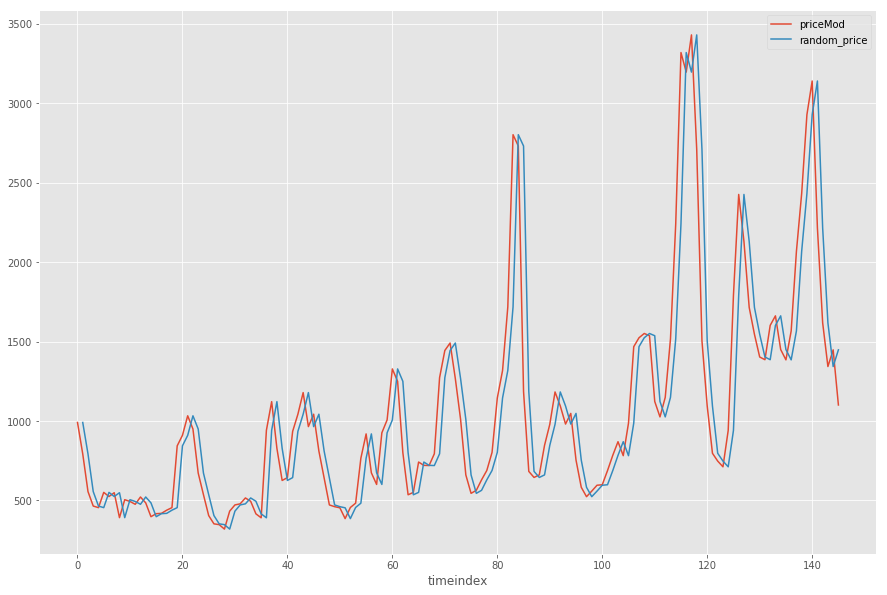

In [41]:
# lets compare random price and actual price
df_bang.plot(kind="line", x="timeindex", y = ["priceMod", "random_price"])

In [42]:
# evaluate the random walk model
random_model_RMSE = RMSE(df_bang.priceMod, df_bang.random_price)
random_model_RMSE

323.59240006420174

In [43]:
Result_df.loc[2,"Model"] = "Random Model"
Result_df.loc[2,"Forcast"] = np.exp(df_bang.shift_log_priceMod[-1])
Result_df.loc[2,"RMSE"] = random_model_RMSE
Result_df

,Model,Forcast,RMSE
0,Mean Model,884.566,683.953
1,Linear Model,1754.43,518.524
2,Random Model,1448,323.592


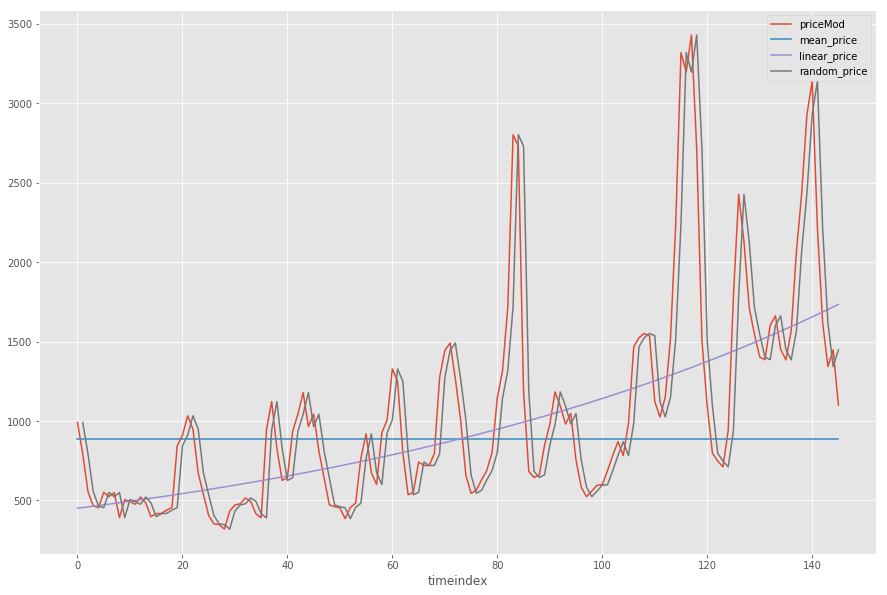

In [44]:
df_bang.plot(kind="line", x="timeindex", y = ["priceMod", "mean_price", "linear_price", "random_price"])

# Advanced Modelling technique

Most of the time series models work on the assumption that the time series is stationary. Intuitively, we can see that if a time series has a particular behaviour over time, there is a very high probability that it will follow the same in the future. Also, the theories related to stationary series are more mature and easier to implement as compared to non-stationary series

**Statistical stationarity**: A stationary time series is one whose statistical properties such as mean, variance, autocorrelation, etc. are all constant over time. Most statistical forecasting methods are based on the assumption that the time series can be rendered approximately stationary (i.e., "stationarized") through the use of mathematical transformations. A stationarized series is relatively easy to predict: you simply predict that its statistical properties will be the same in the future as they have been in the past! 

There are three basic criterion for a series to be classified as stationary series :

- The mean of the series should not be a function of time rather should be a constant. 

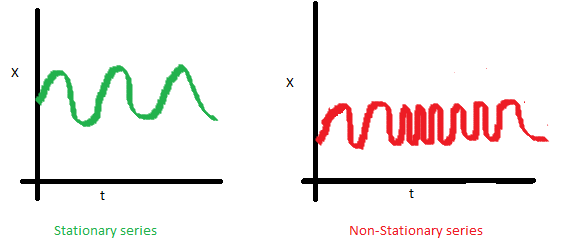

- The variance of the series should not a be a function of time. This property is known as homoscedasticity.

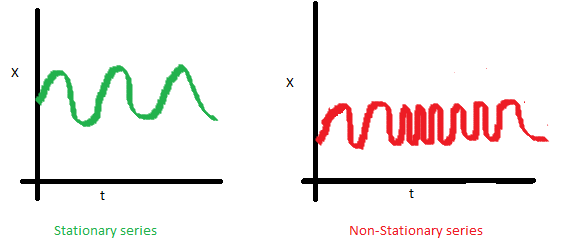

- The covariance of the i th term and the (i + m) th term should not be a function of time.

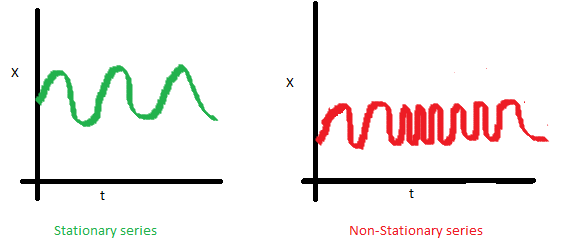

### How do we check for Stationarity in a series? 

- **Plotting Rolling Statistics**: We can plot the moving average or moving variance and see if it varies with time. By moving average/variance I mean that at any instant ‘t’, we’ll take the average/variance of the last year, i.e. last 12 months. But again this is more of a visual technique.
- **Dickey-Fuller Test**: This is one of the statistical tests for checking stationarity. Here the null hypothesis is that the time series is non-stationary. The test results comprise of a Test Statistic and some Critical Values for difference confidence levels. If the ‘Test Statistic’ is less than the ‘Critical Value’, we can reject the null hypothesis and say that the series is stationary.

###  Augmented Dickey Fuller Test of Stationarity


The Augmented Dickey-Fuller test is a type of statistical test called a unit root test.

The intuition behind a unit root test is that it determines how strongly a time series is defined by a trend.

There are a number of unit root tests and the Augmented Dickey-Fuller may be one of the more widely used. It uses an autoregressive model and optimizes an information criterion across multiple different lag values.

The null hypothesis of the test is that the time series can be represented by a unit root, that it is not stationary (has some time-dependent structure). The alternate hypothesis (rejecting the null hypothesis) is that the time series is stationary.

    Null Hypothesis (H0): If failed to be rejected, it suggests the time series has a unit root, meaning it is non-stationary. It has some time dependent structure.
    Alternate Hypothesis (H1): The null hypothesis is rejected; it suggests the time series does not have a unit root, meaning it is stationary. It does not have time-dependent structure.


## How to make a Time Series Stationary?

Lets understand what is making a time series non-stationary. There are 3 major reasons behind non-stationarity:

   **Trend** : A trend exists when there is a long-term increase or decrease in the data. It does not have to be linear. Sometimes we will refer to a trend “changing direction” when it might go from an increasing trend to a decreasing trend.
   
   **Seasonal** : A seasonal pattern exists when a series is influenced by seasonal factors (e.g., the quarter of the year, the month, or day of the week). Seasonality is always of a fixed and known period.
   
   **Cyclic** : A cyclic pattern exists when data exhibit rises and falls that are not of fixed period. The duration of these fluctuations is usually of at least 2 years.

**$$y_t = S_t + T_t + E_t$$**

where $y_t$ is the data at period t, $S_t$ is the seasonal component at period 't', $T_t$ is the trend-cycle component at period tt and $E_t$ is the remainder (or irregular or error) component at period tt.


### Forecasting Steps

The underlying principle is to model or estimate the trend and seasonality in the series and remove those from the series to get a stationary series. Then statistical forecasting techniques can be implemented on this series. The final step would be to convert the forecasted values into the original scale by applying trend and seasonality constraints back.

### Estimating and Eliminating Trend

    Transformation - Take a log, sqrt, cuberoot etc. transformation
    Aggregation – taking average for a time period like monthly/weekly averages
    Smoothing – taking rolling averages, exponential smoothing
    Polynomial Fitting – fit a regression model

### Simple Moving Average

As a first step in moving beyond mean models, random walk model and linear trend models, nonseasonal patterns and trends can be extrapolated using a moving-average or smoothing model. The basic assumption behind averaging and smoothing models is that the time series is locally stationary with a slowly varying mean. 

Hence, we take a moving (local) average to estimate the current value of the mean and then use that as the forecast for the near future. This can be considered as a compromise between the mean model and the random-walk-without-drift-model. 

The same strategy can be used to estimate and extrapolate a local trend. A moving average is often called a "smoothed" version of the original series because short-term averaging has the effect of smoothing out the bumps in the original series. By adjusting the degree of smoothing (the width of the moving average), we can hope to strike some kind of optimal balance between the performance of the mean and random walk models.

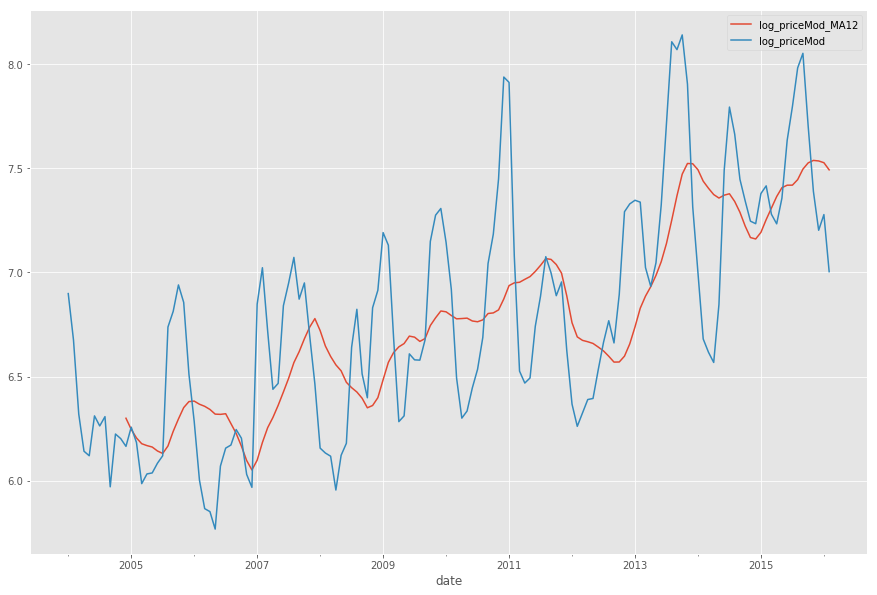

In [45]:
# smoothing the value using 12 month moving average
df_bang["log_priceMod_MA12"] = df_bang.log_priceMod.rolling(12).mean()
df_bang.plot(kind="line", y=["log_priceMod_MA12", "log_priceMod"])

The long-term forecasts from the SMA model are a horizontal straight line, just as in the random walk model. Thus, the SMA model assumes that there is no trend in the data.

However, whereas the forecasts from the random walk model are simply equal to the last observed value, the forecasts from the SMA model are equal to a weighted average of recent values.

In [46]:
df_bang["MA12_price"] = np.exp(df_bang.log_priceMod_MA12)
df_bang.sample(5)

,quantity,priceMod,date,log_priceMod,mean_price,timeindex,linear_price,linear_price_quant,shift_log_priceMod,log_priceMod_diff,random_price,log_priceMod_MA12,MA12_price
date,,,,,,,,,,,,,
2008-04,323078,386,2008-04-01,5.955837,884.565812,51,724.528380,699.989409,6.118097,-0.162260,454.0,6.556640,703.902376
2007-11,940095,811,2007-11-01,6.698268,884.565812,46,691.669274,790.068139,6.949856,-0.251588,1043.0,6.737393,843.359558
2010-05,395519,564,2010-05-01,6.335054,884.565812,76,913.776517,891.650375,6.300786,0.034268,545.0,6.780877,880.840998
2006-07,301129,472,2006-07-01,6.156979,884.565812,30,596.206003,579.983697,6.070738,0.086241,433.0,6.322052,556.714026
2013-07,349474,2241,2013-07-01,7.714677,884.565812,114,1300.267094,1205.924744,7.324490,0.390187,1517.0,7.139417,1260.693564


In [47]:
MA_model_forcast = df_bang.log_priceMod_MA12.tail(12).mean()

### Evaluate MA12 model

In [48]:
MA12_model_RMSE = RMSE(df_bang.priceMod, df_bang.MA12_price)
MA12_model_RMSE

518.821751048081

In [49]:
Result_df.loc[3,"Model"] = "Moving Average 12"
Result_df.loc[3,"Forcast"] = np.exp(MA_model_forcast)
Result_df.loc[3,"RMSE"] = MA12_model_RMSE
Result_df.head()

,Model,Forcast,RMSE
0,Mean Model,884.566,683.953
1,Linear Model,1754.43,518.524
2,Random Model,1448,323.592
3,Moving Average 12,1731.28,518.822


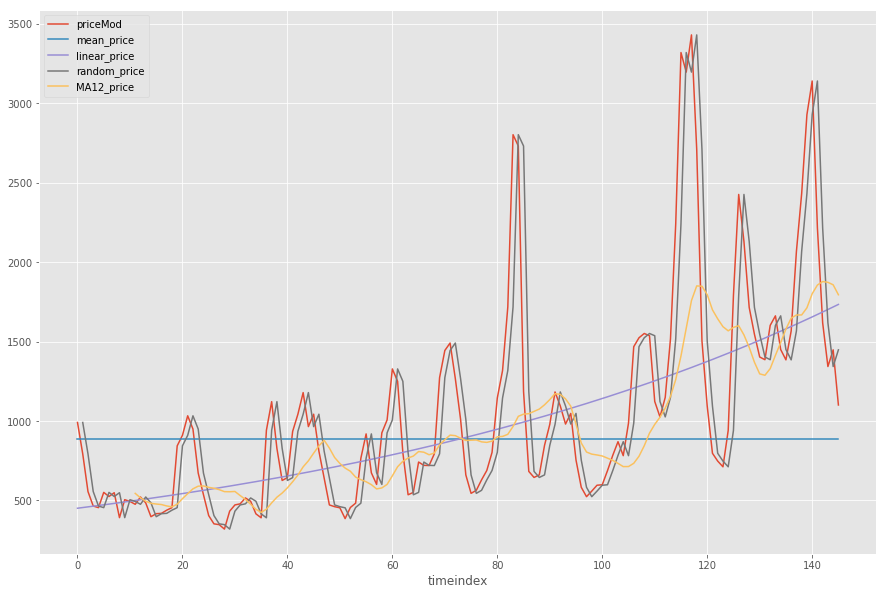

In [50]:
df_bang.plot(kind="line", x="timeindex", y = ["priceMod", "mean_price", "linear_price",
                                             "random_price", "MA12_price"])

In [51]:
def adf(ts):
    # Determing rolling statistics
    rolmean = ts.rolling(window=12).mean()
    rolstd = ts.rolling(window=12).std()

    #Plot rolling statistics:
    ts.plot(color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    # Calculate ADF factors
    adftest = adfuller(ts, autolag='AIC')
    adfoutput = pd.Series(adftest[0:4], index=['Test Statistic','p-value','# of Lags Used',
                                              'Number of Observations Used'])
    for key,value in adftest[4].items():
        adfoutput['Critical Value (%s)'%key] = value
    return adfoutput

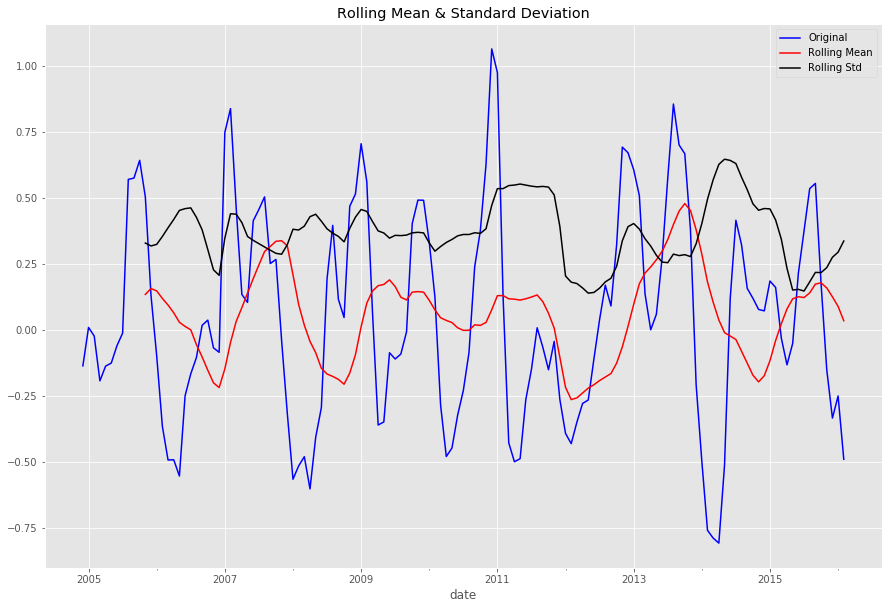

Test Statistic                -6.523729e+00
p-value                        1.026903e-08
# of Lags Used                 1.000000e+00
Number of Observations Used    1.330000e+02
Critical Value (1%)           -3.480500e+00
Critical Value (5%)           -2.883528e+00
Critical Value (10%)          -2.578496e+00
dtype: float64

In [52]:
# Test remaining part for Stationary
ts = df_bang.log_priceMod - df_bang.log_priceMod_MA12
ts.dropna(inplace= True)
adf(ts)

### Test for stationarity:

If the test statistic is less than the critical value, we can reject the null hypothesis (aka the series is stationary). When the test statistic is greater than the critical value, we fail to reject the null hypothesis (which means the series is not stationary).

## Eliminating Trend and Seasonality

   * Differencing – taking the differece with a particular time lag
   * Decomposition – modeling both trend and seasonality and removing them from the model.



### Differencing

One of the most common methods of dealing with both trend and seasonality is differencing. In this technique, we take the difference of the observation at a particular instant with that at the previous instant. This mostly works well in improving stationarity. We have already done first order difference earlier


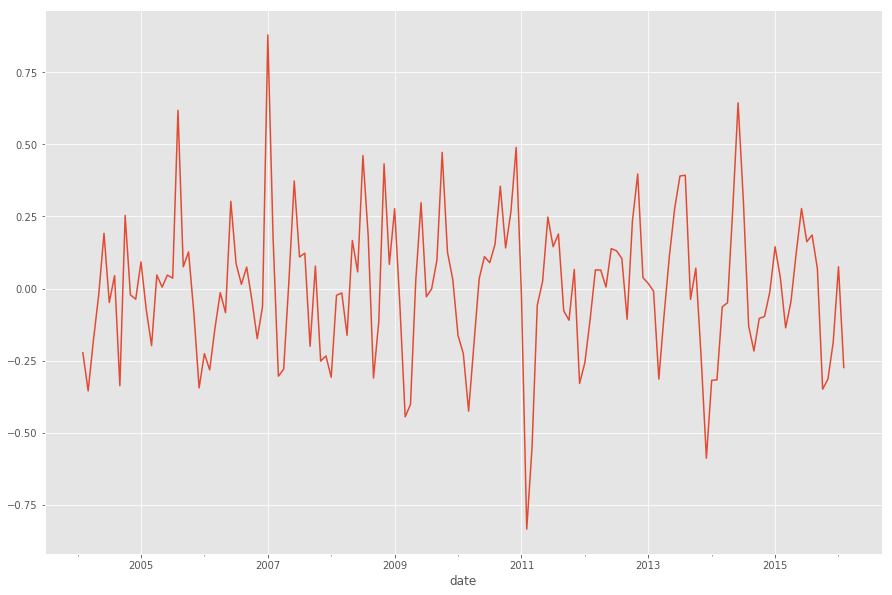

In [53]:
df_bang.log_priceMod_diff.plot()

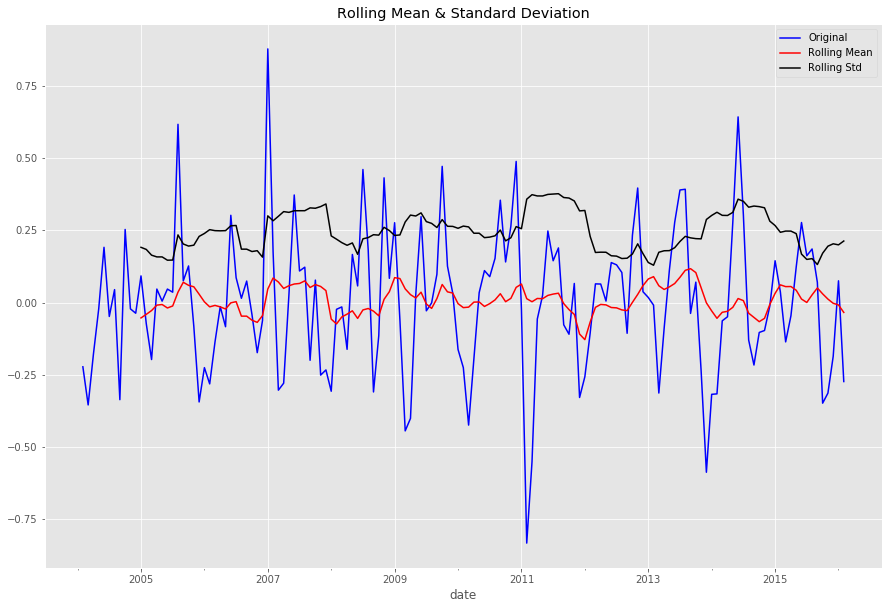

Test Statistic                -7.293246e+00
p-value                        1.399305e-10
# of Lags Used                 7.000000e+00
Number of Observations Used    1.370000e+02
Critical Value (1%)           -3.479007e+00
Critical Value (5%)           -2.882878e+00
Critical Value (10%)          -2.578149e+00
dtype: float64

In [54]:
# Test remaining part for Stationary
ts = df_bang.log_priceMod_diff
ts.dropna(inplace = True)
adf(ts)

### Test for stationarity: 

If the test statistic is less than the critical value, we can reject the null hypothesis (aka the series is stationary). When the test statistic is greater than the critical value, we fail to reject the null hypothesis (which means the series is not stationary).


## Time Series Decomposition

We can also decompose the time series into trend and seasonality


In [55]:
from statsmodels.tsa.seasonal import seasonal_decompose

df_bang.index = pd.to_datetime(df_bang.date)
df_bang.head()

,quantity,priceMod,date,log_priceMod,mean_price,timeindex,linear_price,linear_price_quant,shift_log_priceMod,log_priceMod_diff,random_price,log_priceMod_MA12,MA12_price
date,,,,,,,,,,,,,
2004-01-01,227832,991,2004-01-01,6.898715,884.565812,0,451.289090,431.410971,NaN,NaN,NaN,NaN,NaN
2004-02-01,225133,793,2004-02-01,6.675823,884.565812,1,455.497732,434.277110,6.898715,-0.222891,991.0,NaN,NaN
2004-03-01,221952,556,2004-03-01,6.320768,884.565812,2,459.745622,437.007747,6.675823,-0.355055,793.0,NaN,NaN
2004-04-01,185150,465,2004-04-01,6.142037,884.565812,3,464.033127,428.667281,6.320768,-0.178731,556.0,NaN,NaN
2004-05-01,137390,455,2004-05-01,6.120297,884.565812,4,468.360617,413.029454,6.142037,-0.021740,465.0,NaN,NaN


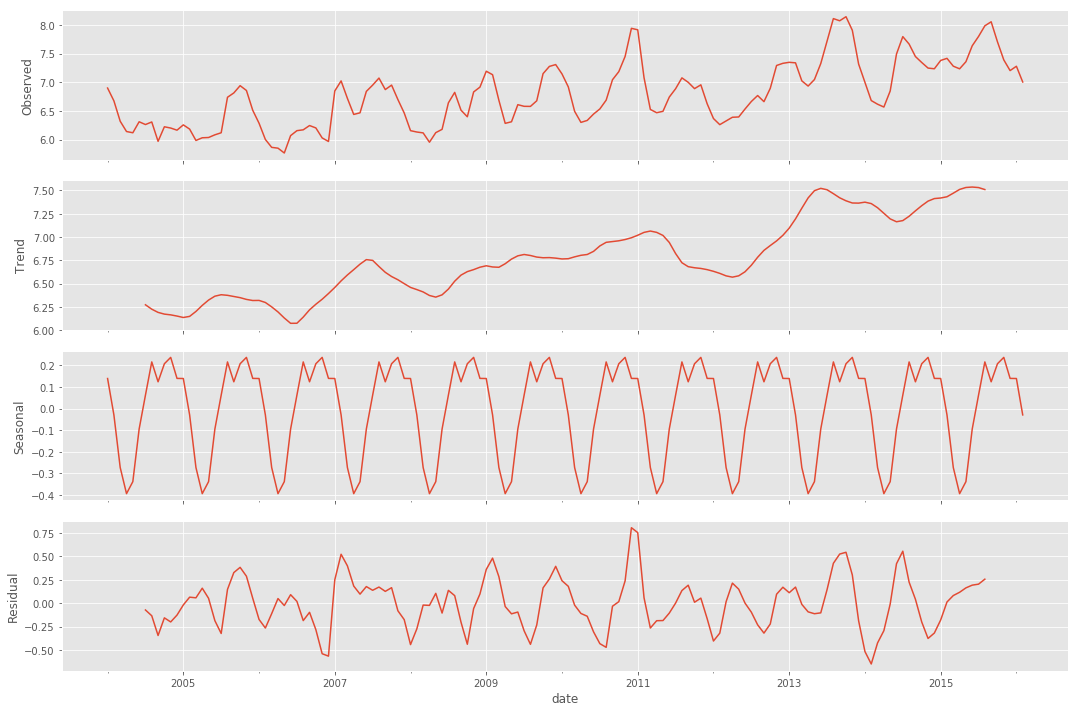

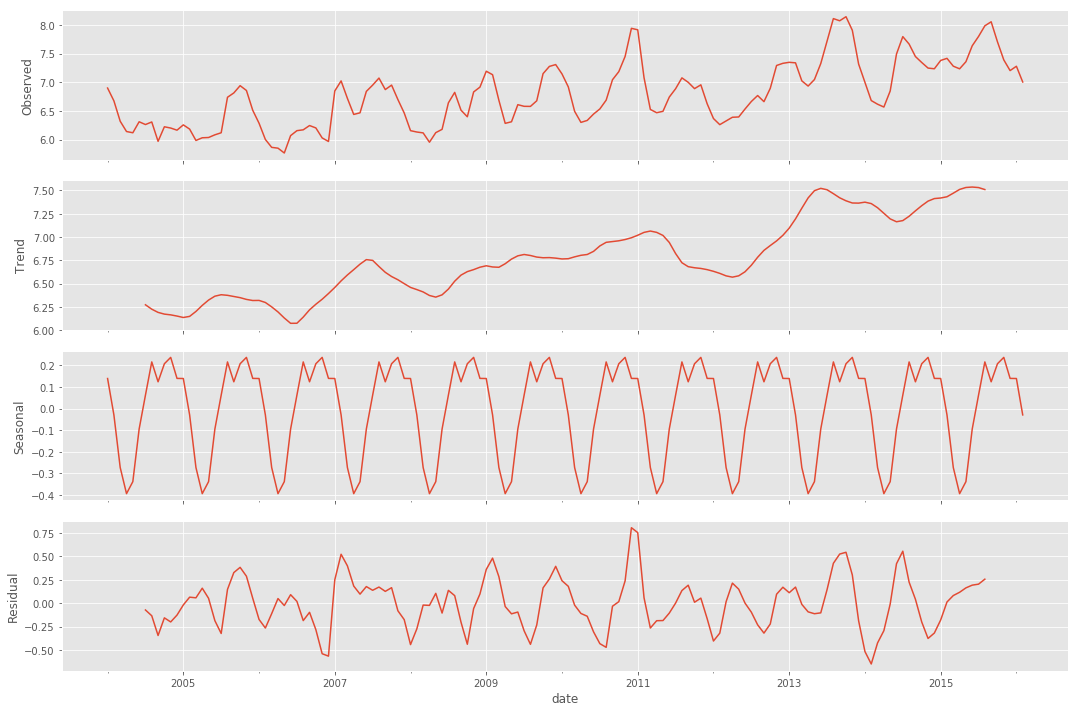

In [56]:
decomposition = seasonal_decompose(df_bang.log_priceMod, model = "additive")
decomposition.plot()

In [57]:
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

### Evaluate the Decomposition model

In [58]:
df_bang["decomp_price"] = np.exp(trend + seasonal)
decomp_model_RMSE = RMSE(df_bang.priceMod, df_bang.decomp_price)
decomp_model_RMSE

374.10858464802345

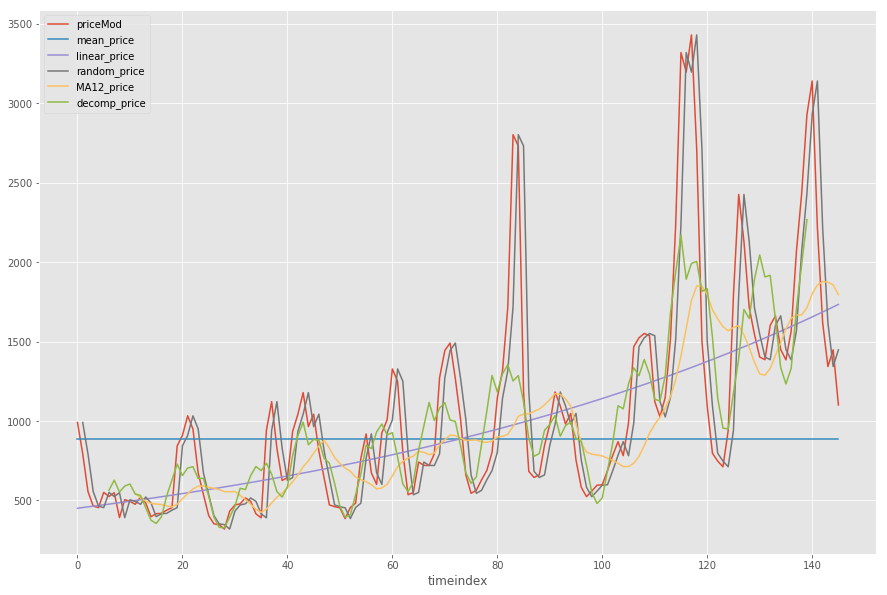

In [59]:
df_bang.plot(kind="line", x="timeindex", y = ["priceMod", "mean_price", "linear_price", "random_price",
                                             "MA12_price", "decomp_price"])

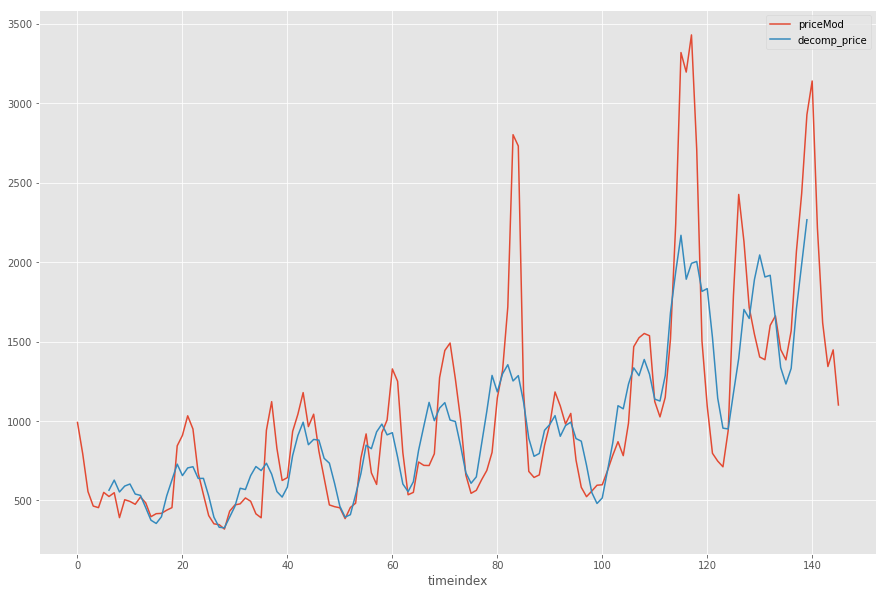

In [60]:
df_bang.plot(kind="line", x="timeindex", y = ["priceMod",
                                              "decomp_price"])

## Auto Regressive Models - AR(p)

In an autoregression model, we forecast the variable of interest using a linear combination of past values of the variable. The term autoregression indicates that it is a regression of the variable against itself.

Thus an autoregressive model of order (p) can be written as

$$y_t = c + m_1y_{t-1} + m_2y_{t-2} + m_3y_{t-3} + ..$$

**Random walk model is an AR(1) model with** $$m_1=1,  c = 0$$
**Random walk model with drift model** $$m_1=1,  c \not= 0$$

We normally restrict autoregressive models to stationary data, and then some constraints on the values of the parameters are required.

For an AR(1) model:   $$−1<m_1<−1$$
For an AR(2) model:   
$$−1<m_2<−1, m_1 + m_2 < 1, m_2 - m_1 <1$$

## Moving Average Model - MA(q)

Rather than use past values of the forecast variable in a regression, a moving average model uses past forecast errors in a regression-like model.

$$y_t=c+e_t+l_1 e_{t−1}+l_2 e_{t−2} + ... + l_q e_{t-q}$$

where `e` is white noise. We refer to this as an MA(`q`) model. Of course, we do not observe the values of e(t), so it is not really regression in the usual sense.

Notice that each value of `y(t)` can be thought of as a weighted moving average of the past few forecast errors. 

However, moving average models should not be confused with moving average smoothing. A moving average model is used for forecasting future values while moving average smoothing is used for estimating the trend-cycle of past values.

# ARIMA Model

If we combine differencing with autoregression and a moving average model, we obtain a non-seasonal ARIMA model. ARIMA is an acronym for AutoRegressive Integrated Moving Average model (“integration” in this context is the reverse of differencing). The full model can be written as

- **Number of AR (Auto-Regressive) terms (p)**: AR terms are just lags of dependent variable. For instance if p is 5, the predictors for y(t) will be y(t-1)….y(t-5).
- **Number of MA (Moving Average) terms (q)**: MA terms are lagged forecast errors in prediction equation. For instance if q is 5, the predictors for y(t) will be e(t-1)….e(t-5) where e(i) is the difference between the moving average at ith instant and actual value.
- **Number of Differences (d)**: These are the number of nonseasonal differences, i.e. in this case we took the first order difference. So either we can pass that variable and put d=0 or pass the original variable and put d=1. Both will generate same results.

An importance concern here is how to determine the value of ‘p’ and ‘q’. We use two plots to determine these numbers. Lets discuss them first.

- **Autocorrelation Function (ACF)**: It is a measure of the correlation between the TS with a lagged version of itself. For instance at lag 5, ACF would compare series at time instant ‘t1’…’t2’ with series at instant ‘t1-5’…’t2-5’ (t1-5 and t2 being end points).
- **Partial Autocorrelation Function (PACF)**: This measures the correlation between the TS with a lagged version of itself but after eliminating the variations already explained by the intervening comparisons. Eg at lag 5, it will check the correlation but remove the effects already explained by lags 1 to 4.


In MA model, noise / shock quickly vanishes with time. The AR model has a much lasting effect of the shock.

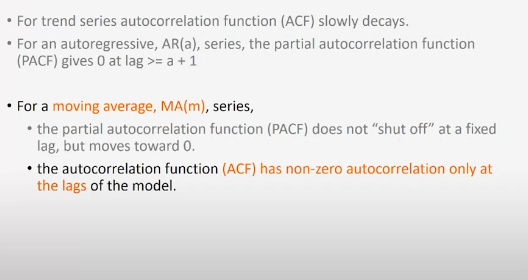

In [61]:
ts = df_bang.log_priceMod
ts_diff = df_bang.log_priceMod_diff
ts_diff.dropna(inplace = True)

In [62]:
#ACF and PACF plots:
from statsmodels.tsa.stattools import acf, pacf
lag_acf = acf(ts_diff, nlags=20)
lag_acf

array([ 1.        ,  0.40215445, -0.02855346, -0.21472715, -0.23756032,
       -0.26332645, -0.22038359, -0.08576989, -0.0754398 ,  0.01497797,
        0.12361818,  0.20862956,  0.158123  ,  0.02053933, -0.01290934,
       -0.07097602, -0.17993659, -0.09514604, -0.04878255, -0.08854117,
       -0.18810881])

### ACF Plot

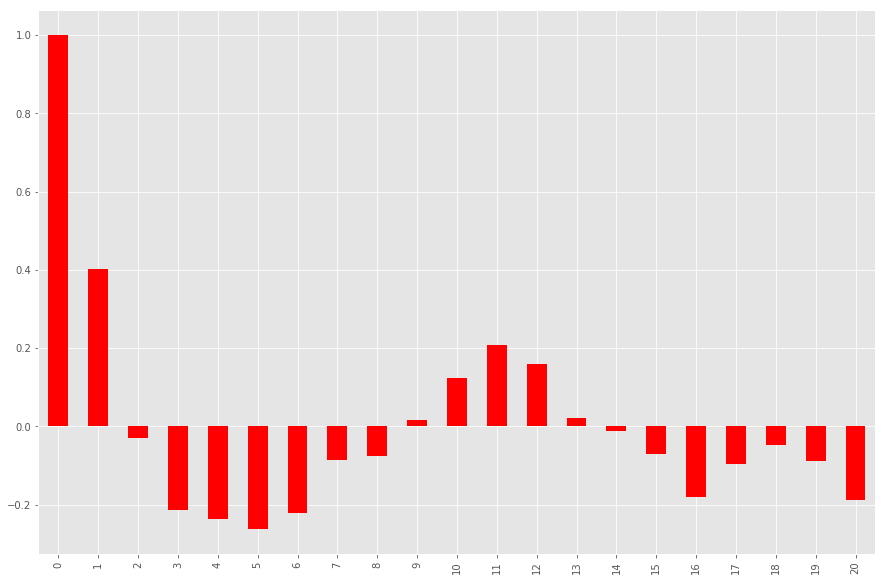

In [66]:
ACF = pd.Series(lag_acf)
ACF.plot(kind="bar", color="red")

### PACF plot

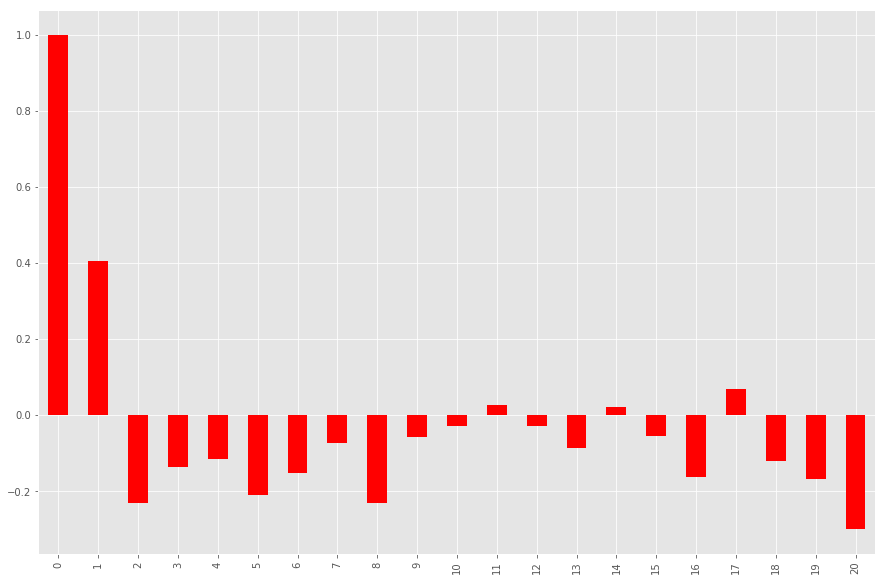

In [65]:
lag_pacf = pacf(ts_diff, nlags=20, method='ols')
PACF = pd.Series(lag_pacf)
PACF.plot(kind="bar", color="red")

# Implement ARIMA model

In [69]:
from statsmodels.tsa.arima_model import ARIMA

In [70]:
ts_diff.head()

date
2004-02-01   -0.222891
2004-03-01   -0.355055
2004-04-01   -0.178731
2004-05-01   -0.021740
2004-06-01    0.191437
Name: log_priceMod_diff, dtype: float64

In [71]:
ARIMA_model = ARIMA(ts_diff, order=(1,0,1))
ARIMA_result = ARIMA_model.fit(disp = -1)
ARIMA_result.fittedvalues.head()

C:\Users\u23e00\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


date
2004-02-01   -0.000977
2004-03-01   -0.093805
2004-04-01   -0.139355
2004-05-01   -0.041727
2004-06-01    0.002164
dtype: float64

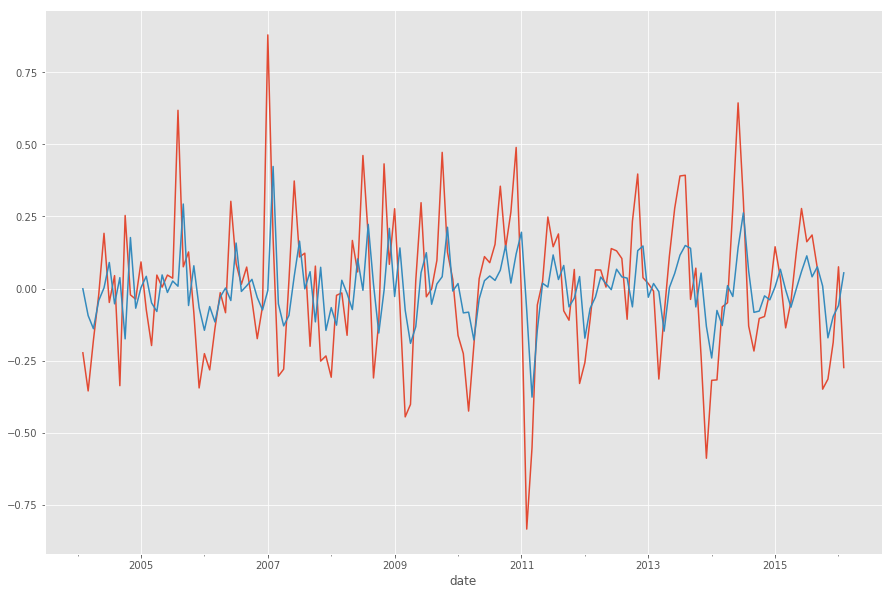

In [72]:
ts_diff.plot()
ARIMA_result.fittedvalues.plot()

In [73]:
ts_diff.sum()

0.1052596023926915

In [75]:
predictions_ARIMA_diff = pd.Series(ARIMA_result.fittedvalues, copy=True)
predictions_ARIMA_diff.tail()

date
2015-10-01    0.008537
2015-11-01   -0.170970
2015-12-01   -0.096505
2016-01-01   -0.059154
2016-02-01    0.054308
dtype: float64

In [76]:
predictions_ARIMA_diff.sum()

0.07204870881282996

In [77]:
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
predictions_ARIMA_diff_cumsum.tail()

date
2015-10-01    0.344369
2015-11-01    0.173399
2015-12-01    0.076894
2016-01-01    0.017740
2016-02-01    0.072049
dtype: float64

In [78]:
predictions_ARIMA_log = pd.Series(ts.ix[0], index=ts.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum,fill_value=0)
predictions_ARIMA_log.tail()

C:\Users\u23e00\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


date
2015-10-01    7.243084
2015-11-01    7.072114
2015-12-01    6.975609
2016-01-01    6.916455
2016-02-01    6.970763
dtype: float64

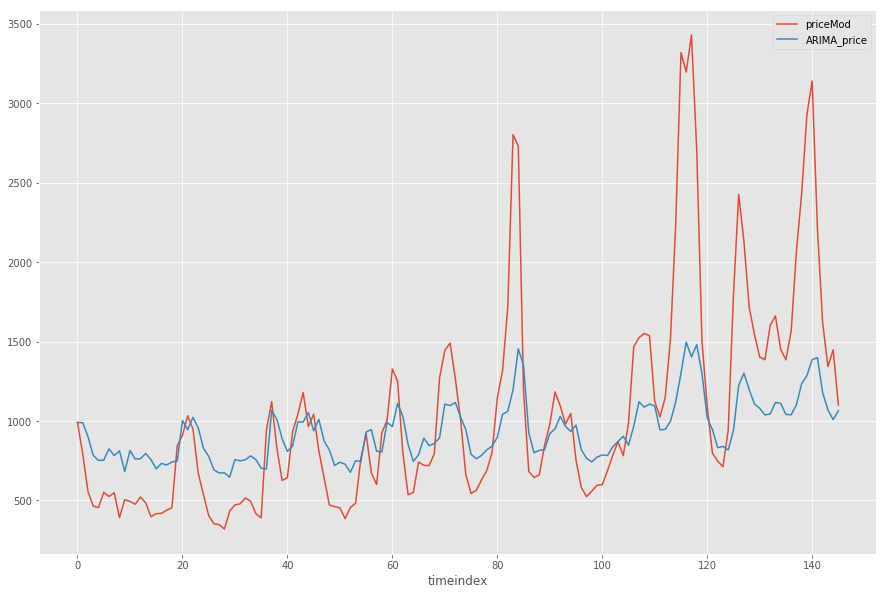

In [80]:
df_bang["ARIMA_price"] = np.exp(predictions_ARIMA_log)
df_bang.plot(kind="line", x="timeindex", y=["priceMod", "ARIMA_price"])

# All model's plot (summary)

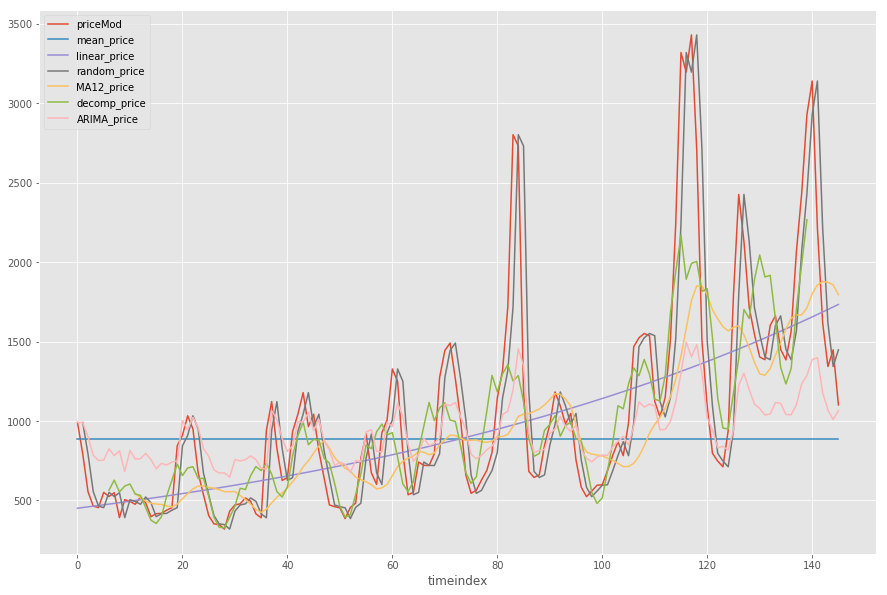

In [81]:
df_bang.plot(kind="line", x="timeindex", y = ["priceMod", "mean_price", "linear_price", "random_price",
                                             "MA12_price", "decomp_price", "ARIMA_price"])